In [459]:
from environment import Environment, FixedBudgetEnvironment
import matplotlib.pyplot as plt
import math
import numpy as np
from game import SumUnanimityGames, GlobalFeatureImportance, LocalFeatureImportance, UnsupervisedFeatureImportance, TestGame
from plot import plot_order
from util import *

In [460]:
from algorithms.CMCS import CMCS, CMCS_Dependent, CMCS_Independent, CMCS_Length
from algorithms.GapE import GapE
from algorithms.SAR import SAR
from algorithms.ApproShapley import ApproShapley
from algorithms.BUS import BUS
from algorithms.HybridApproBUS import SmartHybridApproBUS
from algorithms.SVARM import SVARM, StratSVARM
from algorithms.ShapleySort import ShapleySort
from algorithms.KernelSHAP import KernelSHAP
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [461]:
n=15

In [462]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

In [463]:
filepath_global = "datasets/Global feature importance/Bike sharing regression random forest.csv"
filepath_unsupervised = "datasets/Unsupervised Feature Importance/vf_BigFive.csv"
directory_local = "datasets/adult_classification"
game = GlobalFeatureImportance(filepath=filepath_global, num_players=n, use_cached=True)
# game = LocalFeatureImportance(directory=directory_local, num_players=n)
# game = UnsupervisedFeatureImportance(filepath=filepath_unsupervised, num_players=n)
# game = SumUnanimityGames()
# game = TestGame(n)
game_name = game.name
game_type = game.__class__.__name__

[0.00 33408.28 33408.28 ... 42740.69 42740.69 42734.39]
[6690.04 6690.04 2159.00 3901.99 2393.99 58.97 475.72 674.21 1000.65
 2213.80 1700.79 -253.81 -1068.70 5445.86 10651.84] 42734.391623665346


In [464]:
# values, games = game.reindex_all()
# num_games = len(games)
# shapley_values, _ = game.get_all_phi(values)
# shapley_values.shape

In [465]:
values = game.values[np.newaxis, :]
num_games = 1
shapley_values = game.phi[np.newaxis, :]

In [466]:
var = calc_variance(n, values, shapley_values)
cov = calc_covariance(n, values, shapley_values)
var, cov

(array([[150154739.40, 150154739.40, 24815052.59, 50770379.80,
         32353399.90, 63660.49, 3181430.57, 2387697.99, 3148741.14,
         26573558.49, 22781115.37, 21412549.28, 17931239.55, 64696268.66,
         157485262.79]]),
 array([[[150154739.40, 122860268.22, 51008066.67, 70496133.44,
          56726507.95, 1110470.93, 3192573.01, 1798344.49, 17678935.44,
          50453623.16, 42428715.07, -23368157.00, -28825136.60,
          82399102.66, 127456639.92],
         [122860268.22, 150154739.40, 51008066.67, 70496133.44,
          56726507.95, 1110470.93, 3192573.01, 1798344.49, 17678935.44,
          50453623.16, 42428715.07, -23368157.00, -28825136.60,
          82399102.66, 127456639.92],
         [51008066.67, 51008066.67, 24815052.59, 28917699.71,
          24932162.53, 472009.92, 796135.35, 252538.30, 6456475.08,
          21887833.35, 18928097.07, -14746255.48, -13661123.15,
          32324962.40, 51778179.92],
         [70496133.44, 70496133.44, 28917699.71, 50770379.80,


In [467]:
var_diff_independent = np.zeros_like(cov)
var_diff_independent = var[:, :, np.newaxis] + var[:, np.newaxis, :]
var_diff_dependent = var_diff_independent - 2 * cov
var_diff_dependent, var_diff_independent

(array([[[0.00, 54588942.35, 72953658.65, 59932852.32, 69055123.41,
          147997458.03, 146951023.96, 148945748.40, 117945609.67,
          75821051.56, 88078424.63, 218303602.68, 225736252.15,
          50052802.73, 52726722.34],
         [54588942.35, 0.00, 72953658.65, 59932852.32, 69055123.41,
          147997458.03, 146951023.96, 148945748.40, 117945609.67,
          75821051.56, 88078424.63, 218303602.68, 225736252.15,
          50052802.73, 52726722.34],
         [72953658.65, 72953658.65, 0.00, 17750032.96, 7304127.44,
          23934693.24, 26404212.47, 26697673.98, 15050843.56, 7612944.38,
          9739973.81, 75720112.84, 70068538.43, 24861396.45, 78743955.54],
         [59932852.32, 59932852.32, 17750032.96, 0.00, 17766388.07,
          49766723.58, 51192844.15, 50282284.51, 32957185.19,
          20969006.41, 25883150.12, 92676657.10, 99717559.54,
          20917558.26, 62433583.29],
         [69055123.41, 69055123.41, 7304127.44, 17766388.07, 0.00,
          31153992

In [468]:
var_diff_dependent.shape

(1, 15, 15)

In [469]:
sorted_indices = np.argsort(-shapley_values, axis=-1)
sorted_indices[0]

array([14,  1,  0, 13,  3,  4,  9,  2, 10,  8,  7,  6,  5, 11, 12],
      dtype=int64)

In [470]:
relative_variance = var_diff_dependent / var_diff_independent 
# relative_variance_pairs = relative_variance[:, *np.triu_indices(n, k=1)]
# assert relative_variance_pairs.shape[1] == n*(n-1)/2
relative_variance.shape, relative_variance[0]

((1, 15, 15),
 array([[0.00, 0.18, 0.42, 0.30, 0.38, 0.99, 0.96, 0.98, 0.77, 0.43, 0.51,
         1.27, 1.34, 0.23, 0.17],
        [0.18, 0.00, 0.42, 0.30, 0.38, 0.99, 0.96, 0.98, 0.77, 0.43, 0.51,
         1.27, 1.34, 0.23, 0.17],
        [0.42, 0.42, 0.00, 0.23, 0.13, 0.96, 0.94, 0.98, 0.54, 0.15, 0.20,
         1.64, 1.64, 0.28, 0.43],
        [0.30, 0.30, 0.23, 0.00, 0.21, 0.98, 0.95, 0.95, 0.61, 0.27, 0.35,
         1.28, 1.45, 0.18, 0.30],
        [0.38, 0.38, 0.13, 0.21, 0.00, 0.96, 0.95, 0.96, 0.59, 0.16, 0.23,
         1.55, 1.55, 0.25, 0.39],
        [0.99, 0.99, 0.96, 0.98, 0.96, 0.00, 0.86, 0.89, 0.96, 0.96, 0.95,
         1.03, 0.99, 0.97, 0.99],
        [0.96, 0.96, 0.94, 0.95, 0.95, 0.86, 0.00, 0.29, 0.99, 0.86, 0.80,
         0.88, 0.80, 0.87, 0.94],
        [0.98, 0.98, 0.98, 0.95, 0.96, 0.89, 0.29, 0.00, 1.01, 0.94, 0.90,
         0.90, 0.86, 0.90, 0.96],
        [0.77, 0.77, 0.54, 0.61, 0.59, 0.96, 0.99, 1.01, 0.00, 0.59, 0.62,
         1.19, 1.44, 0.68, 0.78],
     

In [471]:
batch_indices = np.arange(num_games)[:, None]
relative_variance_pairs = relative_variance[
    batch_indices,
    sorted_indices[:, :-1],
    sorted_indices[:, 1:]
]

In [472]:
relative_variance_pairs[0]

array([0.17, 0.18, 0.23, 0.18, 0.21, 0.16, 0.15, 0.20, 0.62, 1.01, 0.29,
       0.86, 1.03, 0.34])

In [473]:
relative_variance_pairs.shape

(1, 14)

In [474]:
plt.style.use(plt.style.library['ggplot'])
plt.rcParams.update({'font.size': 12})
plt.rcParams['legend.frameon'] = False
plt.rcParams['lines.markersize'] = 10

In [475]:
# histograms = []
# sub_x = 5
# sub_y = int(np.ceil(num_games/sub_x))
# fig, ax = plt.subplots(sub_y, sub_x, figsize=(6*sub_x,5*sub_y), dpi=100)
# for index, var in enumerate(relative_variance_pairs):
#     counts, edges = np.histogram(var, bins=20, range=(0,2))
#     x = edges[:-1]
#     widths = edges[1:] - edges[:-1]
#     area = counts * widths
#     density = area / np.sum(area)
#     i, j = index // sub_x, index % sub_x
#     ax[i,j].set_ylim(0, 1)
#     ax[i, j].bar(x, density, widths)
# fig.show()
# plt.savefig(f"results/difference_variance_evaluation/{game_type}({game_name})_all_games_all_pairs", bbox_inches='tight')

In [476]:
all_games_relative_variance_pairs = relative_variance_pairs.reshape(-1)
all_games_relative_variance_pairs.shape

(14,)

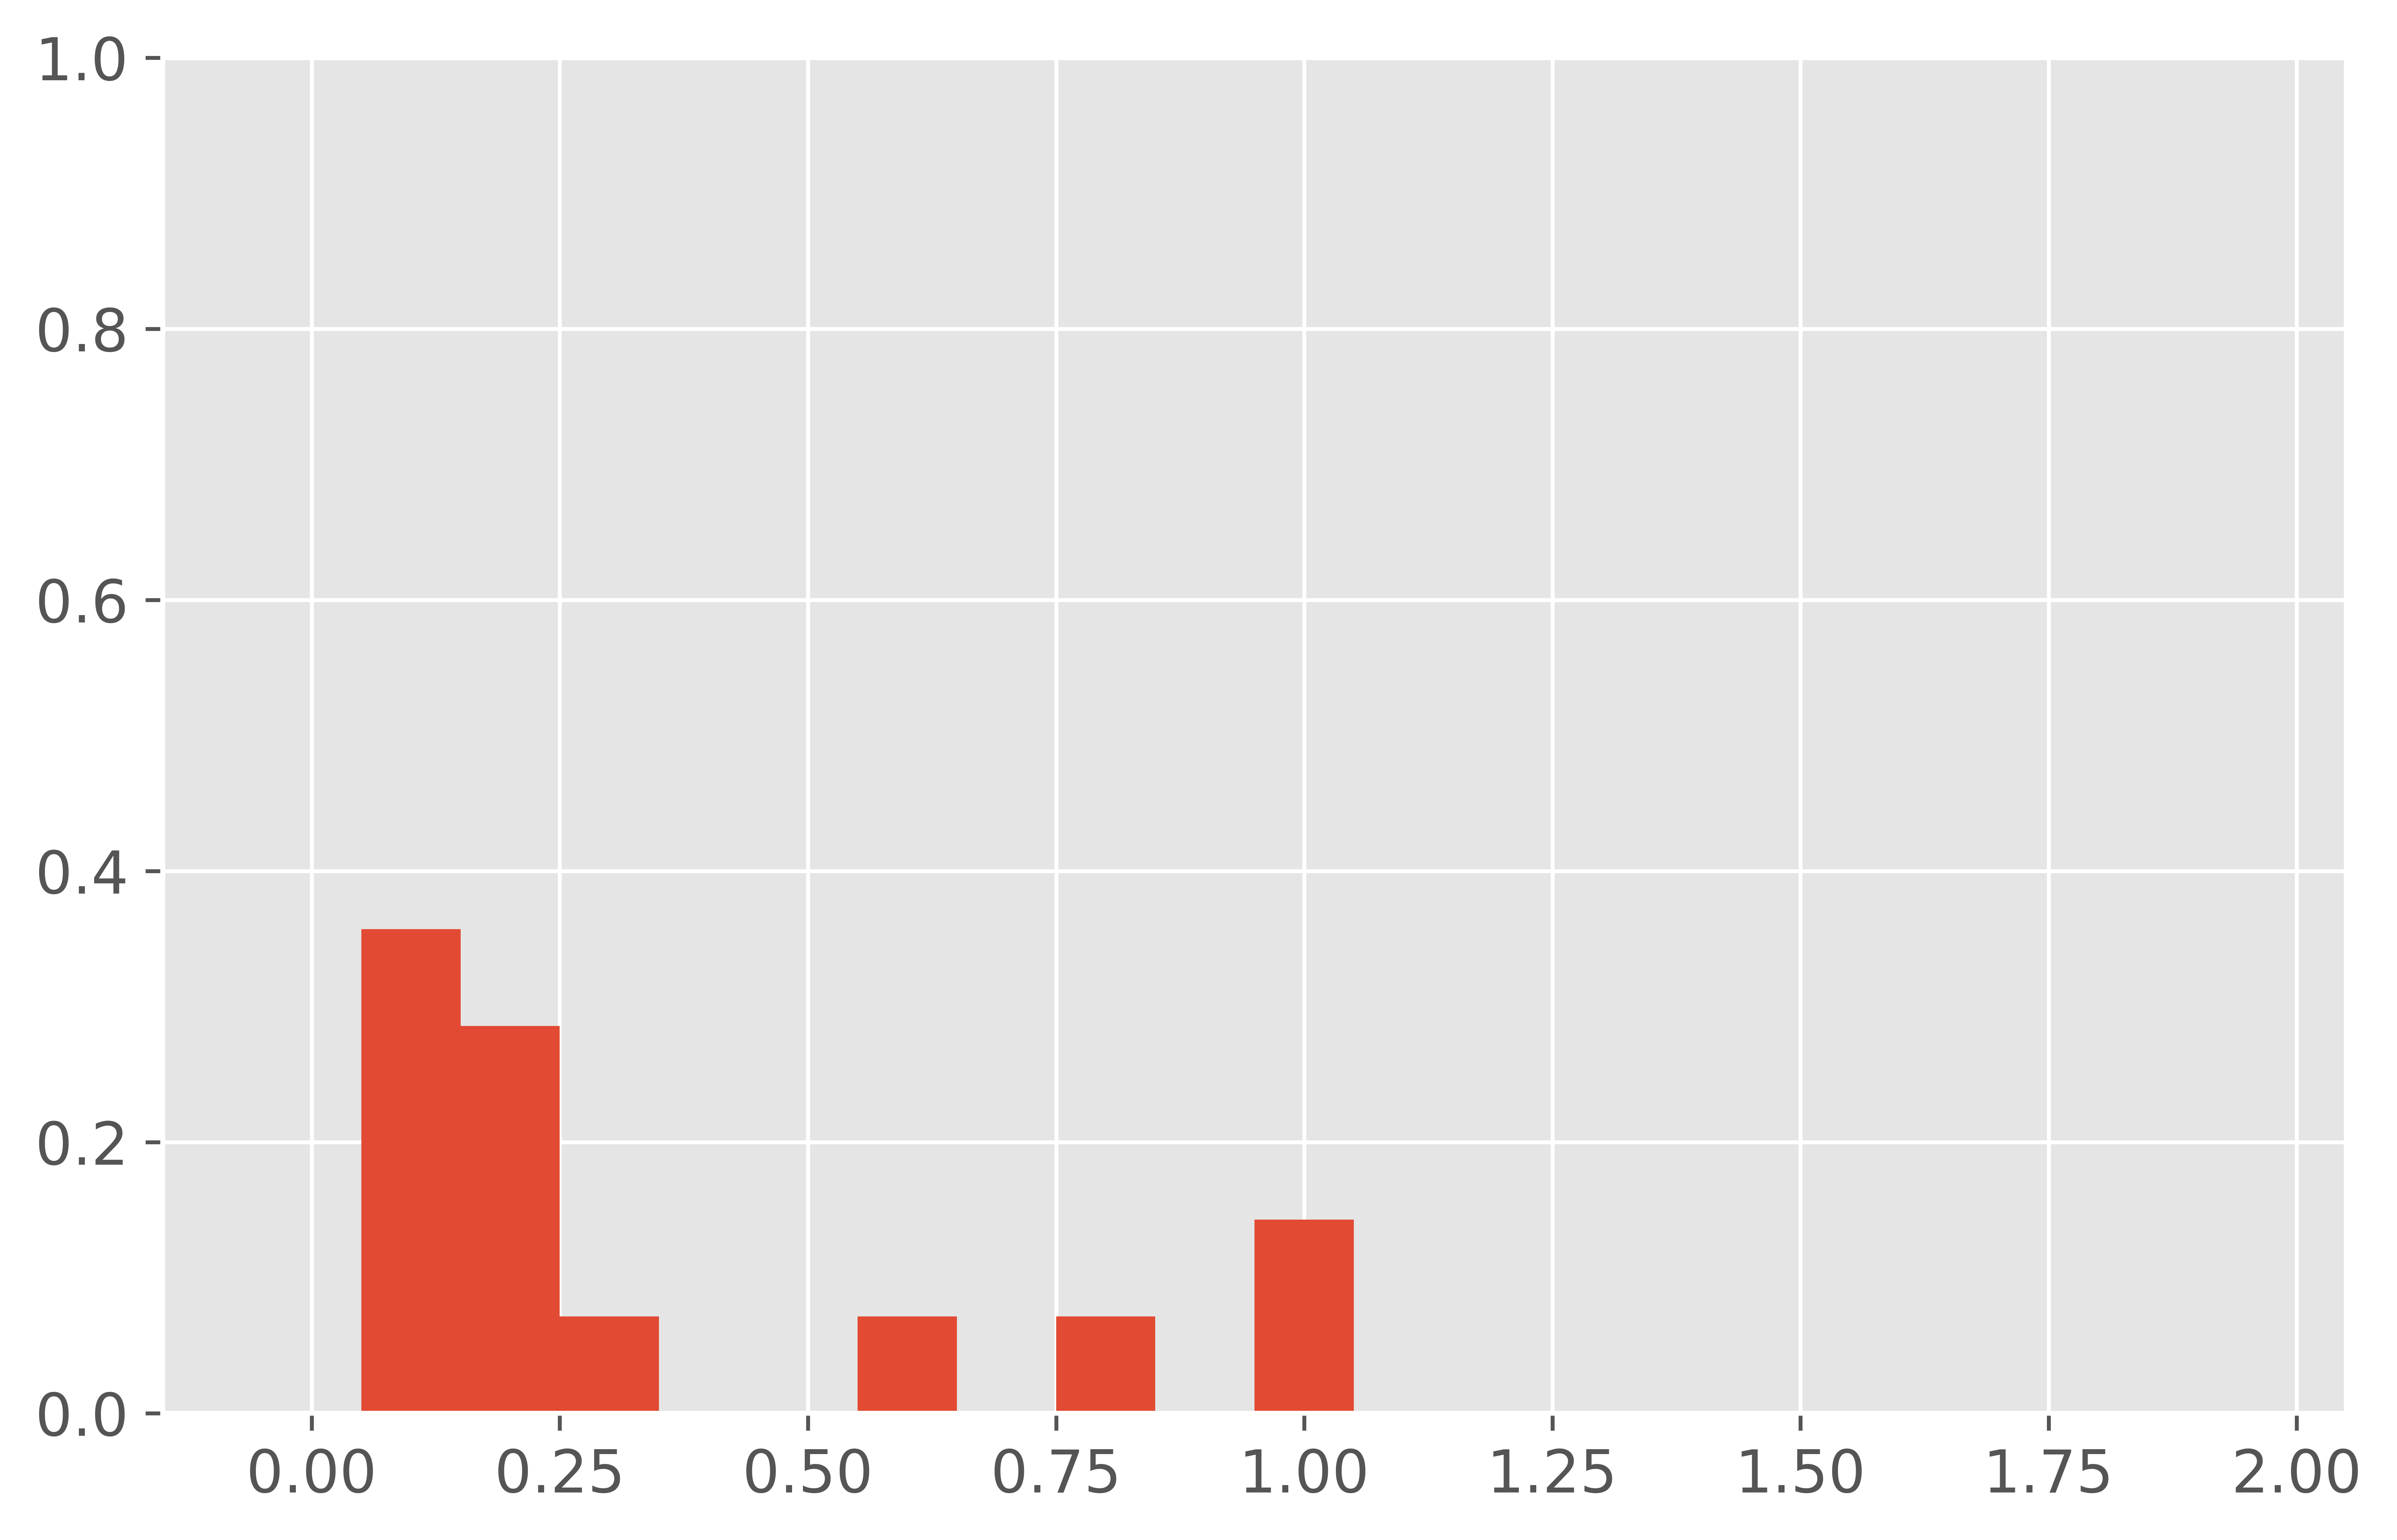

In [477]:
fig, ax = plt.subplots(1, 1, figsize=(8,5), dpi=1000)
counts, edges = np.histogram(all_games_relative_variance_pairs, bins=20, range=(0,2))
x = edges[:-1]
widths = edges[1:] - edges[:-1]
area = counts * widths
density = area / np.sum(area)
ax.set_ylim(0, 1)
ax.bar(x, density, widths)
plt.savefig(f"results/difference_variance_evaluation/{game_type}({game.name})_aggregate_all_pairs", bbox_inches='tight')

In [478]:
mean_relative_variance_pais = np.mean(relative_variance_pairs, axis=1)

In [479]:
# fig, ax = plt.subplots(1, 1, figsize=(8,5), dpi=1000)
# counts, edges = np.histogram(mean_relative_variance_pais, bins=20, range=(0,2))
# x = edges[:-1]
# widths = edges[1:] - edges[:-1]
# area = counts * widths
# density = area / np.sum(area)
# ax.set_ylim(0, 1)
# ax.bar(x, density, widths)
# plt.savefig(f"results/difference_variance_evaluation/{game_type}({game.name})_mean_all_pairs", bbox_inches='tight')

In [480]:
k=1

In [481]:
sorted = np.argsort(-shapley_values, axis=1)
topk, rest = sorted[:, :k], sorted[:, k:]
topk.shape, rest.shape


((1, 1), (1, 14))

In [482]:
relative_variance[0]

array([[0.00, 0.18, 0.42, 0.30, 0.38, 0.99, 0.96, 0.98, 0.77, 0.43, 0.51,
        1.27, 1.34, 0.23, 0.17],
       [0.18, 0.00, 0.42, 0.30, 0.38, 0.99, 0.96, 0.98, 0.77, 0.43, 0.51,
        1.27, 1.34, 0.23, 0.17],
       [0.42, 0.42, 0.00, 0.23, 0.13, 0.96, 0.94, 0.98, 0.54, 0.15, 0.20,
        1.64, 1.64, 0.28, 0.43],
       [0.30, 0.30, 0.23, 0.00, 0.21, 0.98, 0.95, 0.95, 0.61, 0.27, 0.35,
        1.28, 1.45, 0.18, 0.30],
       [0.38, 0.38, 0.13, 0.21, 0.00, 0.96, 0.95, 0.96, 0.59, 0.16, 0.23,
        1.55, 1.55, 0.25, 0.39],
       [0.99, 0.99, 0.96, 0.98, 0.96, 0.00, 0.86, 0.89, 0.96, 0.96, 0.95,
        1.03, 0.99, 0.97, 0.99],
       [0.96, 0.96, 0.94, 0.95, 0.95, 0.86, 0.00, 0.29, 0.99, 0.86, 0.80,
        0.88, 0.80, 0.87, 0.94],
       [0.98, 0.98, 0.98, 0.95, 0.96, 0.89, 0.29, 0.00, 1.01, 0.94, 0.90,
        0.90, 0.86, 0.90, 0.96],
       [0.77, 0.77, 0.54, 0.61, 0.59, 0.96, 0.99, 1.01, 0.00, 0.59, 0.62,
        1.19, 1.44, 0.68, 0.78],
       [0.43, 0.43, 0.15, 0.27, 0.16,

In [483]:
topk[0], rest[0]

(array([14], dtype=int64),
 array([ 1,  0, 13,  3,  4,  9,  2, 10,  8,  7,  6,  5, 11, 12],
       dtype=int64))

In [484]:
indices_topk = np.zeros((num_games, k, n-k), dtype=np.int32)
indices_rest = np.zeros((num_games, k, n-k), dtype=np.int32)
print(indices_topk.shape, indices_rest.shape)
for game in range(num_games):
    indices_topk[game], indices_rest[game] = np.meshgrid(topk[game], rest[game], indexing='ij')

(1, 1, 14) (1, 1, 14)


In [485]:
np.mgrid[:num_games, :k*(n-k)][0].shape

(1, 14)

In [486]:
relevant_pairs = relative_variance[np.mgrid[:num_games, :k*(n-k)][0], indices_topk.reshape(num_games, -1), indices_rest.reshape(num_games, -1)]
relevant_pairs

array([[0.17, 0.17, 0.24, 0.30, 0.39, 0.45, 0.43, 0.51, 0.78, 0.96, 0.94,
        0.99, 1.28, 1.34]])

In [487]:
# histograms = []
# sub_x = 5
# sub_y = int(np.ceil(num_games/sub_x))
# fig, ax = plt.subplots(sub_y, sub_x, figsize=(6*sub_x,5*sub_y), dpi=100)
# for index, var in enumerate(relevant_pairs):
#     counts, edges = np.histogram(var, bins=20, range=(0,2))
#     x = edges[:-1]
#     widths = edges[1:] - edges[:-1]
#     area = counts * widths
#     density = area / np.sum(area)
#     i, j = index // sub_x, index % sub_x
#     ax[i,j].set_ylim(0, 1)
#     ax[i, j].bar(x, density, widths)
# fig.show()
# plt.savefig(f"results/difference_variance_evaluation/{game_type}({game_name})_all_games_top{k}_rest", bbox_inches='tight')

In [488]:
mean_relevant_pairs = np.mean(relevant_pairs, axis=1)

In [489]:
# fig, ax = plt.subplots(1, 1, figsize=(8,5), dpi=1000)
# counts, edges = np.histogram(mean_relevant_pairs, bins=20, range=(0,2))
# x = edges[:-1]
# widths = edges[1:] - edges[:-1]
# area = counts * widths
# density = area / np.sum(area)
# ax.set_ylim(0, 1)
# ax.bar(x, density, widths)
# plt.savefig(f"results/difference_variance_evaluation/{game_type}({game_name})_mean_top{k}_rest", bbox_inches='tight')

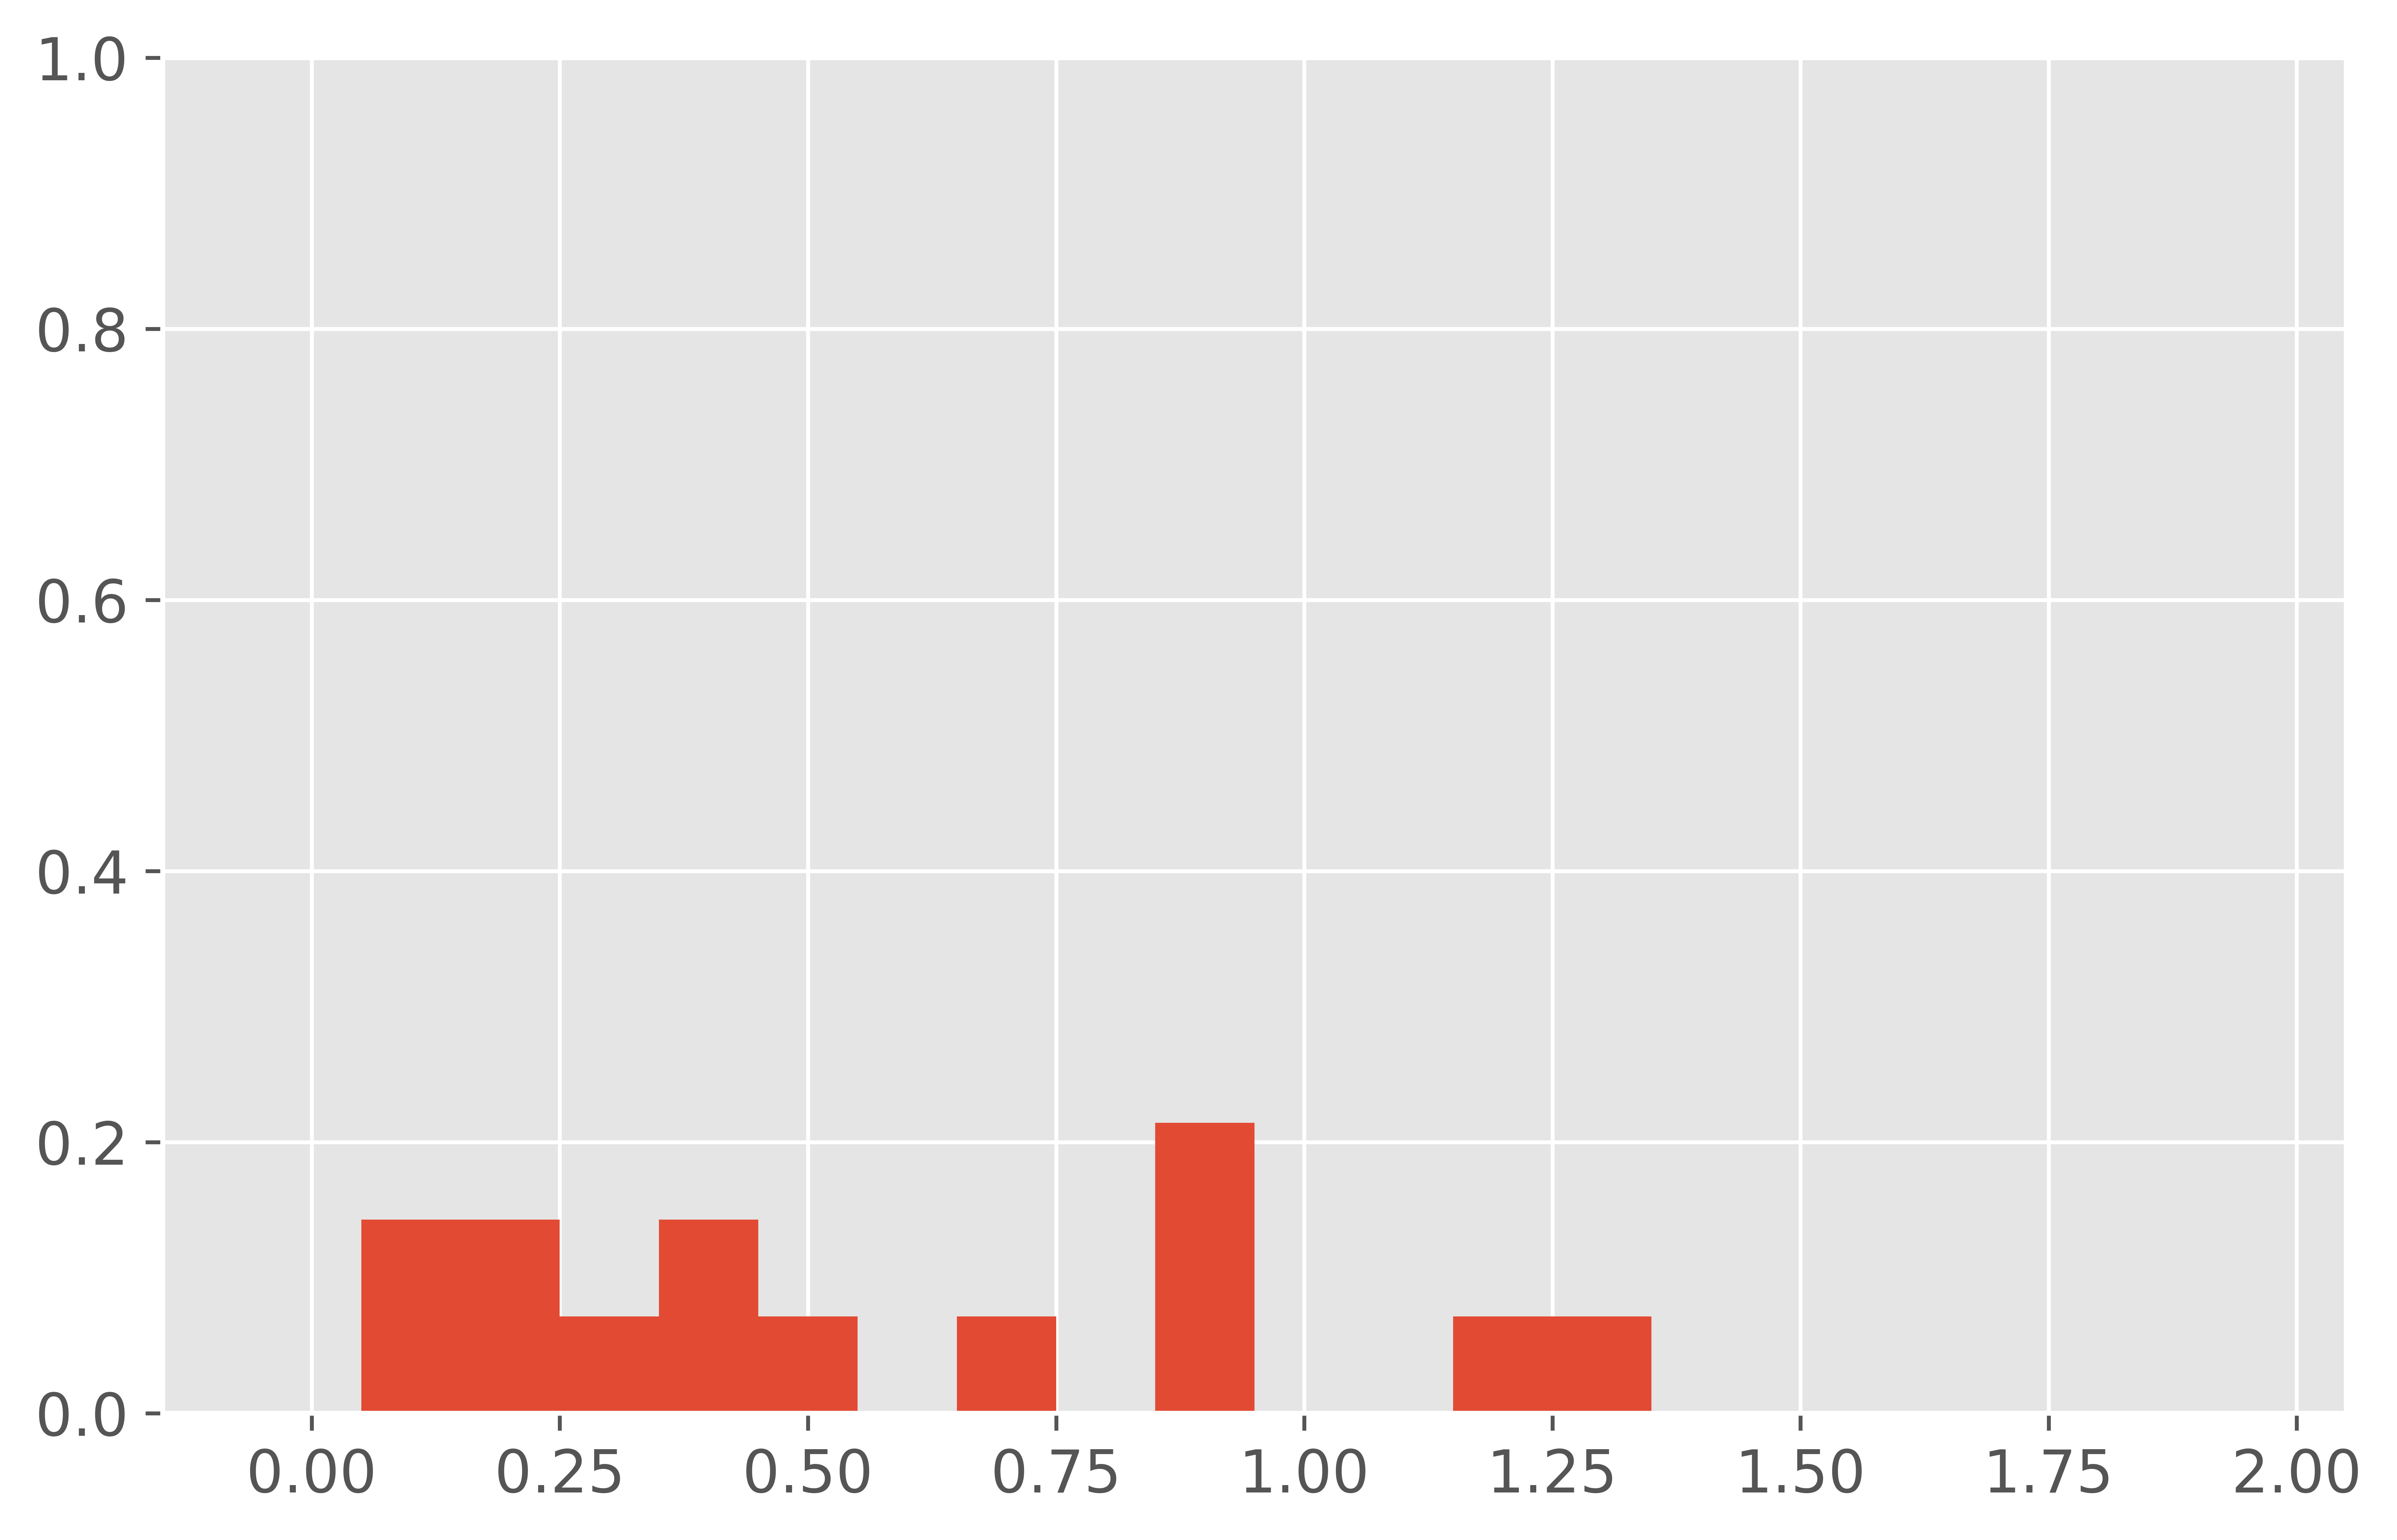

In [490]:
fig, ax = plt.subplots(1, 1, figsize=(8,5), dpi=1000)
counts, edges = np.histogram(relevant_pairs.reshape(-1), bins=20, range=(0,2))
x = edges[:-1]
widths = edges[1:] - edges[:-1]
area = counts * widths
density = area / np.sum(area)
ax.set_ylim(0, 1)
ax.bar(x, density, widths)
plt.savefig(f"results/difference_variance_evaluation/{game_type}({game_name})_aggregate_top{k}_rest", bbox_inches='tight')